<a href="https://colab.research.google.com/github/krishnakumarreddy007/64061_ktavva/blob/main/Assignment 04 Text %26 Sequence/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
# The Embedding layer takes at least two arguments:the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from keras.utils import pad_sequences

**Custom-trained embedding layer- Training sample size 100**



In [ ]:
# Consider only the top 10,000 words
max_features = 10000
# Cutoff review after 150 words
maxlen = 150

In [ ]:
# Restricting training samples to 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:100]
y_train = y_train[:100]

In [ ]:
# Turning lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Maximum input length to Embedding layer, later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, activations have shape `(samples, maxlen, 8)`.
# The 3D tensor of embeddings is flattened into a 2D tensor with the form {(samples, maxlen * 8)}
model.add(Flatten())

# Adding the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_16 (Flatten)        (None, 1200)              0         
                                                                 
 dense_18 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 116ms/step - loss: 0.6924 - acc: 0.5500 - val_loss: 0.6923 - val_acc: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6679 - acc: 0.8750 - val_loss: 0.6915 - val_acc: 0.6000
Epoch 3/10
3/3 [====

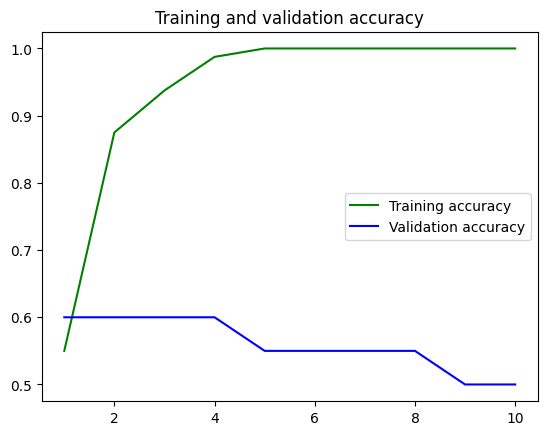

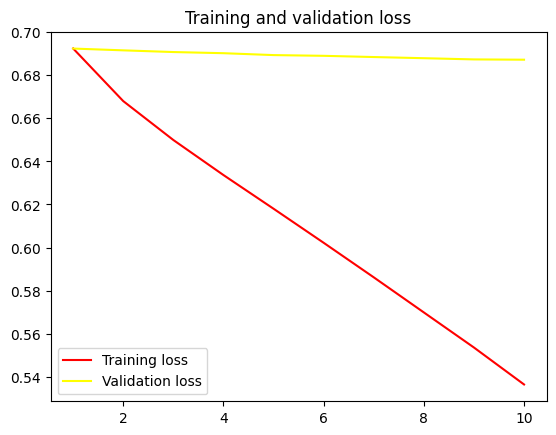

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training Accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plotting every epoch, here it is 10

plt.plot(epochs, acc, "green" ,label = "Training accuracy")
plt.plot(epochs, val_acc, "blue" ,label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "yellow", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Custom-trained embedding layer- Training sample size 500**

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_17 (Flatten)        (None, 1200)              0         
                                                                 
 dense_19 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 27ms/step - loss: 0.6935 - acc: 0.4925 - val_loss: 0.6915 - val_acc: 0.5100
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6752 - acc: 0.8300 - val_loss: 0.6902 - val_acc: 0.5200
Epoch 3/10
13/13 [

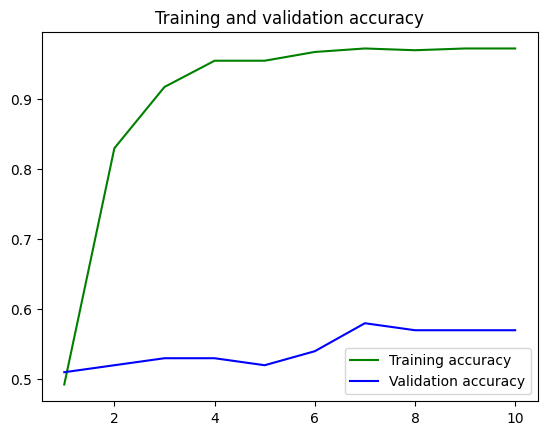

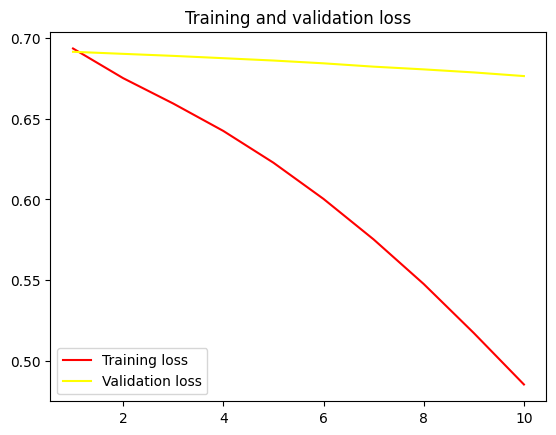

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:the number of possible tokens, in this case 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, in this case 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cutoff reviews
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:500]
y_train = y_train[:500]

# Tunrning lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Embedding layer a maximum input length specification in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, activations have shape `(samples, maxlen, 8)`.

# flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# Add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 20

plt.plot(epochs, acc, "green", label = "Training accuracy")
plt.plot(epochs, val_acc, "blue", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "yellow", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


**Custom-trained embedding layer- Training sample size 1000**

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_18 (Flatten)        (None, 1200)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.6928 - acc: 0.4925 - val_loss: 0.6935 - val_acc: 0.5050
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6756 - acc: 0.7900 - val_loss: 0.6926 - val_acc: 0.4900
Epoch 3/10
25/25 [

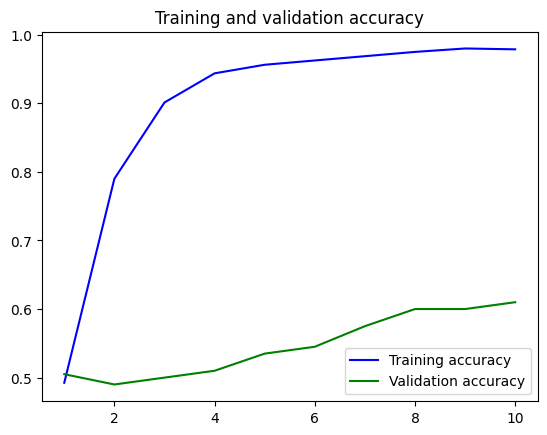

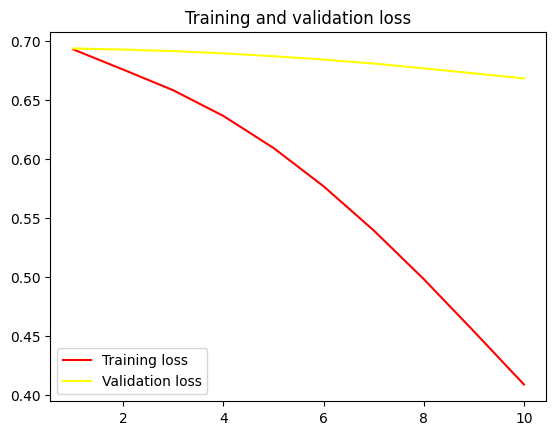

In [ ]:
from keras.layers import Embedding

# At least two parameters are required by the embedding layer: the dimensionality of the embeddings, in this case 64
# the number of tokens possible, which is 1000 (1 + maximum word index)
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# The number of words that should be considered as features
max_features = 10000
# Remove the text after this number of words(from the top max_features most common words)
maxlen = 150

# Data loading as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This changes the integer lists into a {(samples, maxlen)}-shaped 2D integer tensor
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Maximum length of the input to the Embedding layer is specified in order to eventually flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, activations have shape `(samples, maxlen, 8)`.

# The 3D tensor of embeddings is flattened into a 2D tensor with the form {(samples, maxlen * 8)}
model.add(Flatten())

# Adding the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plotting every epoch, here 10

plt.plot(epochs, acc, "blue", label = "Training accuracy")
plt.plot(epochs, val_acc, "green", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "yellow", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Custom-trained embedding layer- Training sample size 10000**

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_19 (Flatten)        (None, 1200)              0         
                                                                 
 dense_21 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.6889 - acc: 0.5499 - val_loss: 0.6745 - val_acc: 0.6580
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5957 - acc: 0.7843 - val_loss: 0.5254 - val_acc: 0.7885
Epoch 3/10
250/

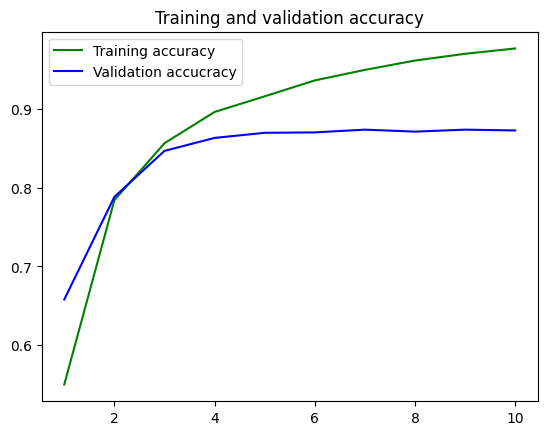

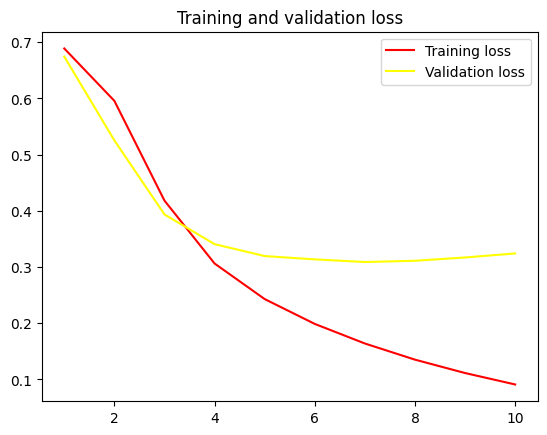

In [ ]:

from keras.layers import Embedding

# At least two parameters are required by the embedding layer:
#the dimensionality of the embeddings, in this case 64
#the number of tokens possible, which is 1000 (1 + maximum word index)
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# The number of words that should be considered as features
max_features = 10000
# Remove the text after this number of words(from the top max_features most common words)
maxlen = 150

# Data loading as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This changes the integer lists into a {(samples, maxlen)}-shaped 2D integer tensor
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Maximum length of the input to the Embedding layer is specified in order to eventually flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, the activations have shape `(samples, maxlen, 8)`.

# The 3D tensor of embeddings is flattened into a 2D tensor with the form {(samples, maxlen * 8)}
model.add(Flatten())

# Adding the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plotting every epoch, here 10

plt.plot(epochs, acc, "green", label = "Training accuracy")
plt.plot(epochs, val_acc, "blue", label = "Validation accucracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "yellow", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# Downloading the Dataset
The raw IMDB dataset can be found at the Stanford AI website (http://ai.stanford.edu/~amaas/data/sentiment/). If the link provided is not working, a quick Google search for "IMDB dataset" should direct you to the correct resource.

Once downloaded, the dataset will be in a compressed format (likely a .tar.gz file). You need to extract this file which will typically create a directory structure containing separate folders for training and testing data. This structure also segregates positive and negative reviews into different folders.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  11.1M      0  0:00:07  0:00:07 --:--:-- 15.1M


In [ ]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Let's break down the text into smaller pieces and convert them into numerical representations suitable for machine learning.

**Tokenization:** We'll split the text data into individual words or meaningful units, like phrases. This creates a list of tokens for each review.

**Vectorization:** We'll convert each token into a numerical representation. This is often done using pre-trained word embeddings, which capture semantic relationships between words.

To emphasize the usefulness of pre-trained word embeddings, we'll limit the training data to only the first 150 reviews. This simulates a scenario with scarce training data, where pre-trained embeddings can offer a significant advantage compared to learning embeddings from scratch.






**Pretrained word embedding layer - Training sample size 100**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 100 words
training_samples = 100  #  restricting training samples to 100
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Download the GloVe word embeddings**

Navigate to Stanford's GloVe page to access detailed information about the GloVe algorithm. From there, download the pre-computed embeddings trained on the 2014 English Wikipedia. This file is a 822MB zip archive named glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or non-word tokens). After downloading, unzip the file to access the embedding vectors. These pre-trained embeddings will be utilized to initialize the embedding layer of our neural network model, providing valuable contextual information to improve the model's performance in natural language processing tasks.

**Pre-process the embeddings**

Let's parse the un-zipped file (it's a txt file) to build an index mapping words (as strings) to their vector representation (as number vectors).

In [ ]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

**Define the model**

We will be using the same model architecture as before

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_20 (Flatten)        (None, 15000)             0         
                                                                 
 dense_22 (Dense)            (None, 32)                480032    
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

When loading pre-trained word embeddings into the Embedding layer, it's essential to set trainable to False. This ensures that the Embedding layer remains non-trainable during model training. By setting trainable to True, you allow the optimization algorithm to modify the values of the word embeddings, which is typically unnecessary for pre-trained embeddings. It's crucial to keep the pre-trained parts fixed during training to prevent them from forgetting the valuable information they already encapsulate.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 536ms/step - loss: 2.9558 - acc: 0.6000 - val_loss: 0.7646 - val_acc: 0.5053
Epoch 2/10
4/4 [==============================] - 1s 435ms/step - loss: 0.5817 - acc: 0.6900 - val_loss: 1.3900 - val_acc: 0.4997
Epoch 3/10
4/4 [==============================] - 1s 452ms/step - loss: 1.1159 - acc: 0.5900 - val_loss: 0.7794 - val_acc: 0.4958
Epoch 4/10
4/4 [==============================] - 1s 449ms/step - loss: 0.1863 - acc: 0.9600 - val_loss: 0.9716 - val_acc: 0.4968
Epoch 5/10
4/4 [==============================] - 1s 413ms/step - loss: 0.1616 - acc: 0.9700 - val_loss: 0.8631 - val_acc: 0.5133
Epoch 6/10
4/4 [==============================] - 1s 451ms/step - loss: 0.0936 - acc: 0.9900 - val_loss: 1.4617 - val_acc: 0.4999
Epoch 7/10
4/4 [==============================] - 1s 449ms/step - loss: 0.2405 - acc: 0.9100 - val_loss: 1.0070 - val_acc: 0.4944
Epoch 8/10
4/4 [==============================] - 1s 458ms/step - loss: 0.0472 - acc: 1.00

As anticipated due to the limited training data, the model promptly exhibits signs of overfitting. This is evident from the fact that it learns to perform well on the training data but struggles to generalize to unseen examples, resulting in a high variance in validation accuracy.

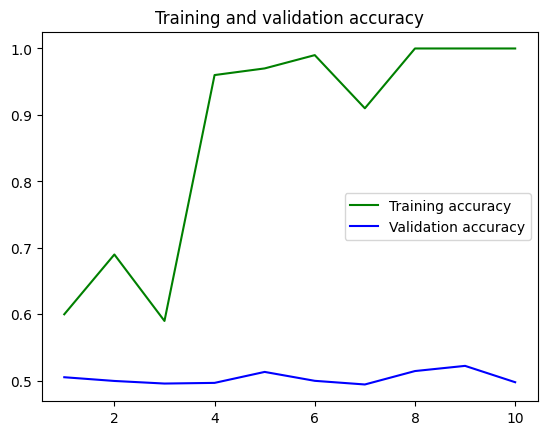

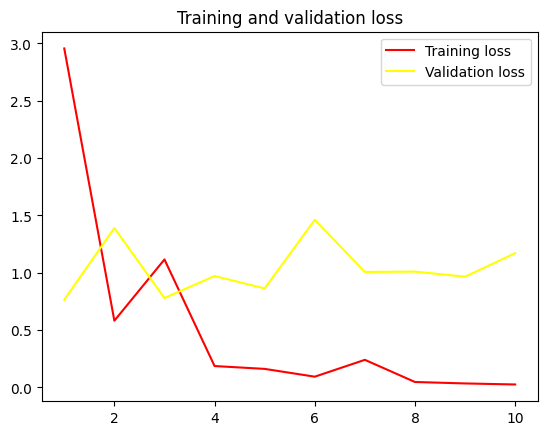

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Pretrained word embedding layer - Training sample size 500**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_21 (Flatten)        (None, 15000)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                480032    
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 3

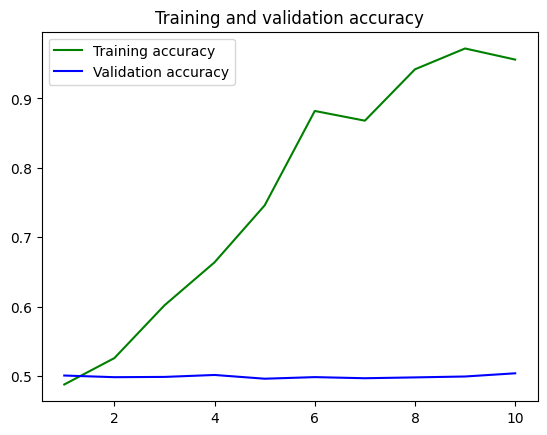

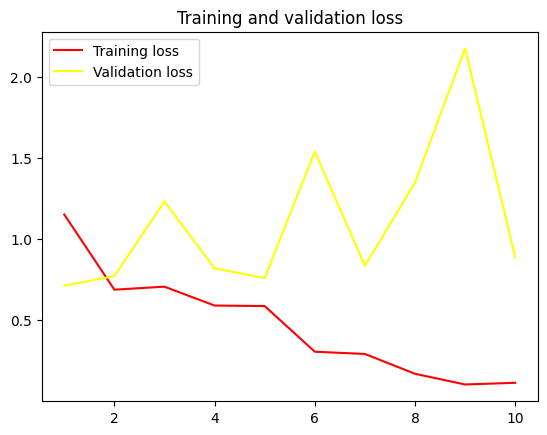

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



**Pretrained word embedding layer - Training sample size 1000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_25 (Flatten)        (None, 15000)             0         
                                                                 
 dense_32 (Dense)            (None, 32)                480032    
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 7

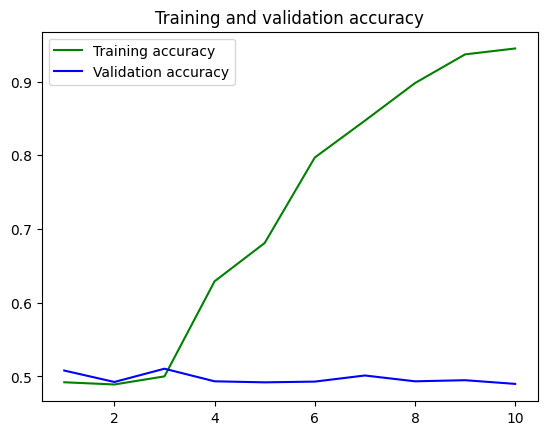

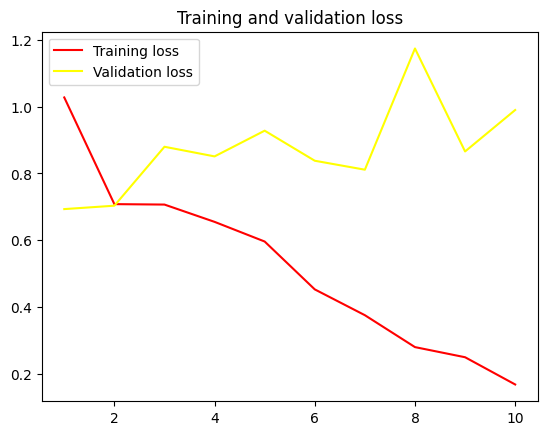

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 1000 #Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


**Pretrained word embedding layer - Training sample size 10000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_24 (Flatten)        (None, 15000)             0         
                                                                 
 dense_30 (Dense)            (None, 32)                480032    
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] -

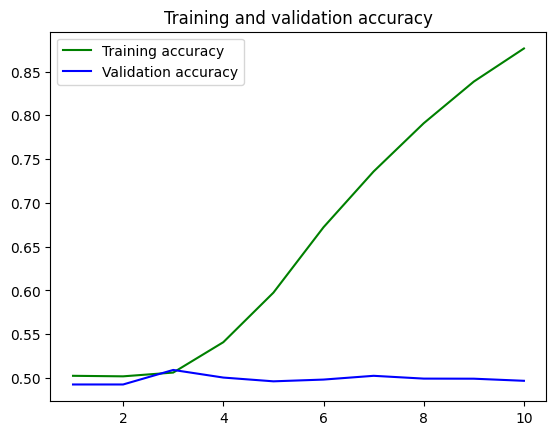

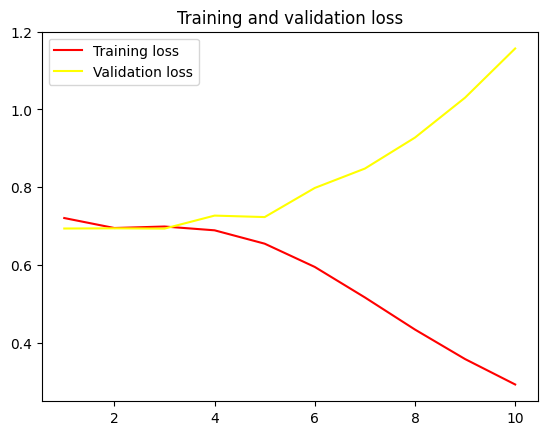

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 10000 # Trains on 10000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()